


### OBJECTIVES
In this Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.

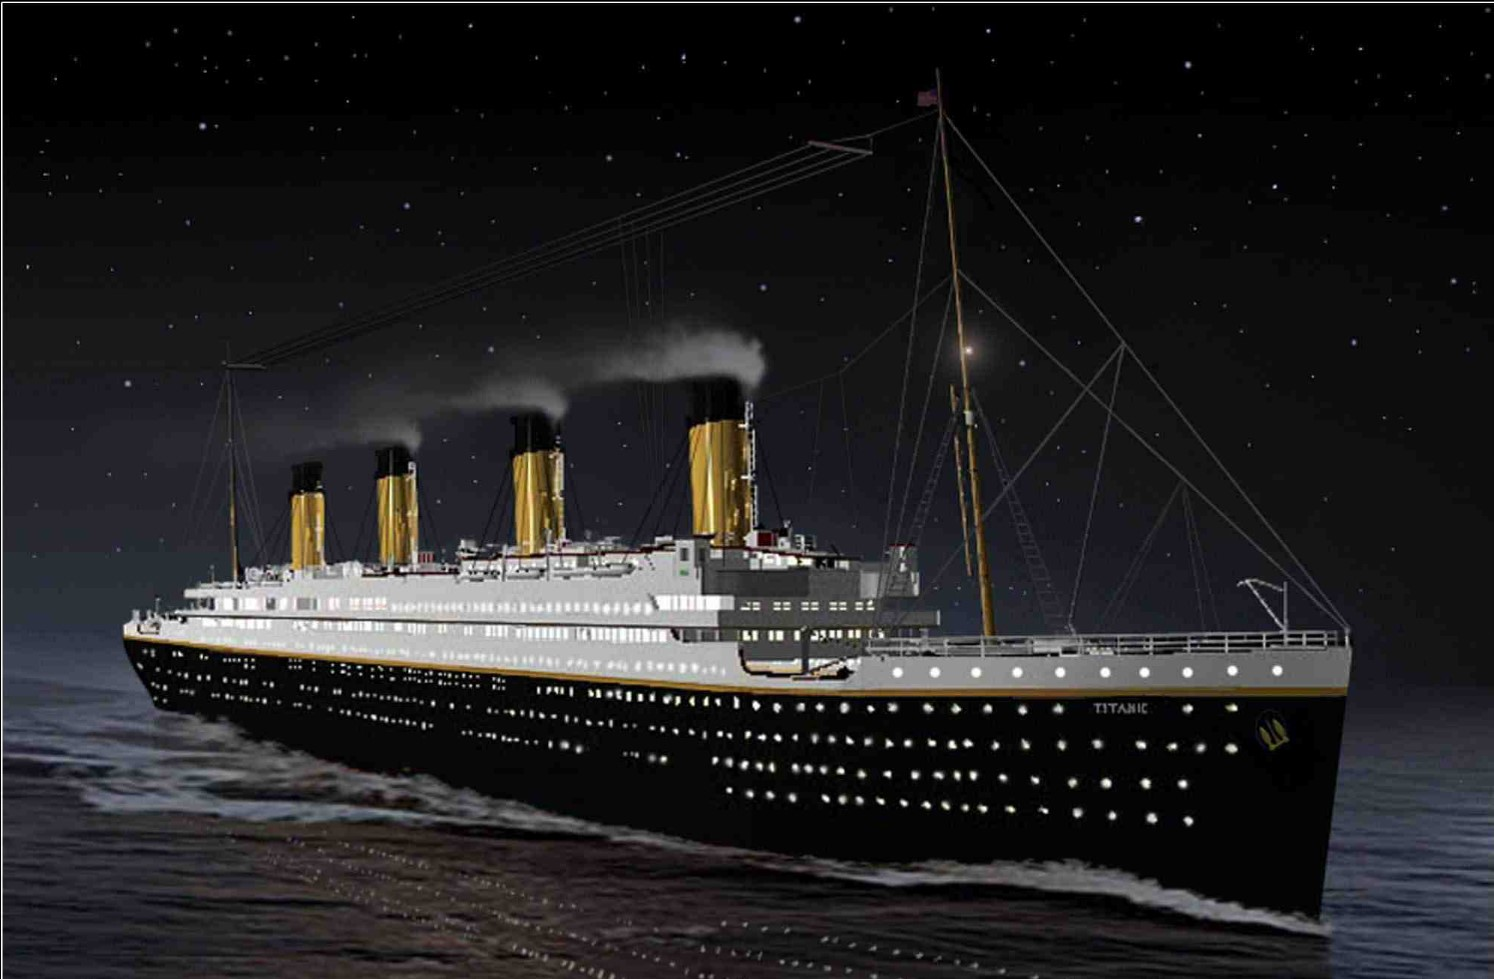

In [2]:
#Important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('tested.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.shape

(418, 12)

In [8]:
df.size

5016

In [9]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

* Here 0 means non survived 1 means survived that is low passengers are survived.

<Axes: xlabel='Survived', ylabel='count'>

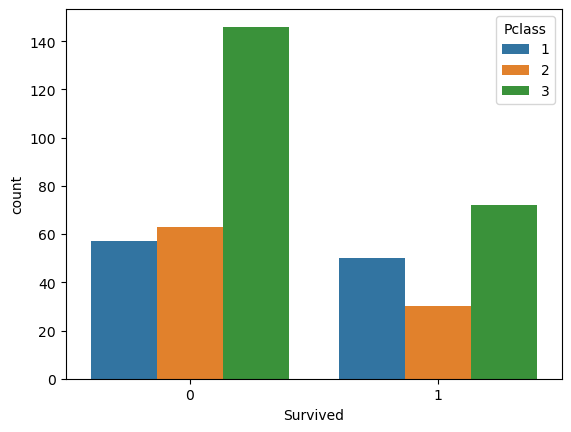

In [10]:
## Visualisation
sns.countplot(x=df['Survived'], hue =df['Pclass'])

In [11]:
df['Sex']

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

* String values does not help for predict model, So I have to convert into integer values.

<Axes: xlabel='Sex', ylabel='count'>

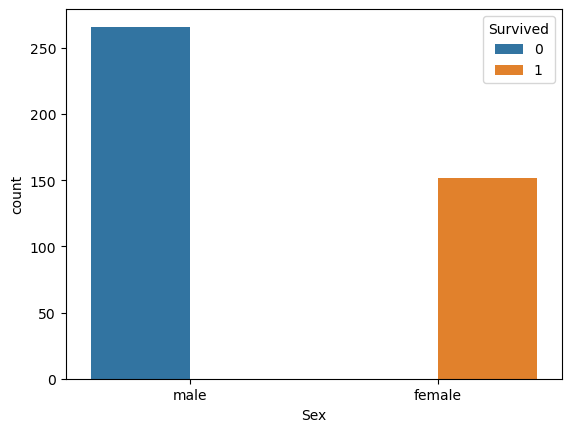

In [12]:
sns.countplot(x=df['Sex'], hue =df['Survived'])

* Here we can see male person has NOT survived as per comparison female passengers.

In [14]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [15]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
Label =LabelEncoder()

In [17]:
df['Sex']= Label.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


* I have converted male & female into numeric values(0= Female and 1= Male).

In [18]:
df['Sex'],df['Survived']

(0      1
 1      0
 2      1
 3      1
 4      0
       ..
 413    1
 414    0
 415    1
 416    1
 417    1
 Name: Sex, Length: 418, dtype: int32,
 0      0
 1      1
 2      0
 3      0
 4      1
       ..
 413    0
 414    1
 415    0
 416    0
 417    0
 Name: Survived, Length: 418, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

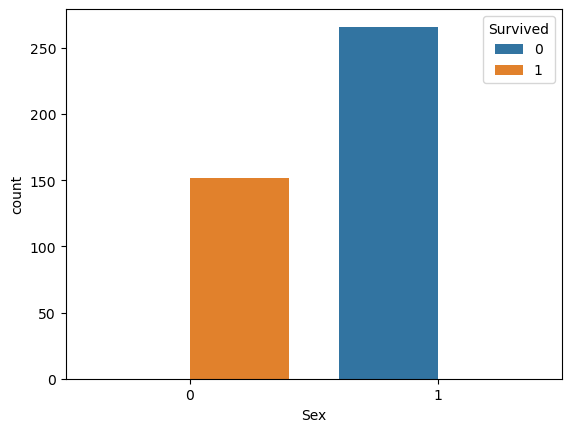

In [19]:
sns.countplot(x=df['Sex'], hue =df['Survived'])

In [20]:
df.isna().sum() #Check null values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* Here we can check null values into Age column that I'll drop in this datset.

In [21]:
df=df.drop(['Age'],axis = 1) # drop null values.

In [22]:
df_final = df
df_final.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,NaN,S


In [23]:
# We have need only two column for prediction Passenger class and gender column that is enough.
x=df[['Pclass','Sex']]
y=df['Survived']

In [24]:
# splits are dataset into two portion 80% of training and 20% of testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y, train_size = 0.2, random_state = 0)

## Logistic Regression
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).
Like all regression analyses, the logistic regression is a predictive analysis.
Logistic regression is used to describe the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables
The name "logistic regression" is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.
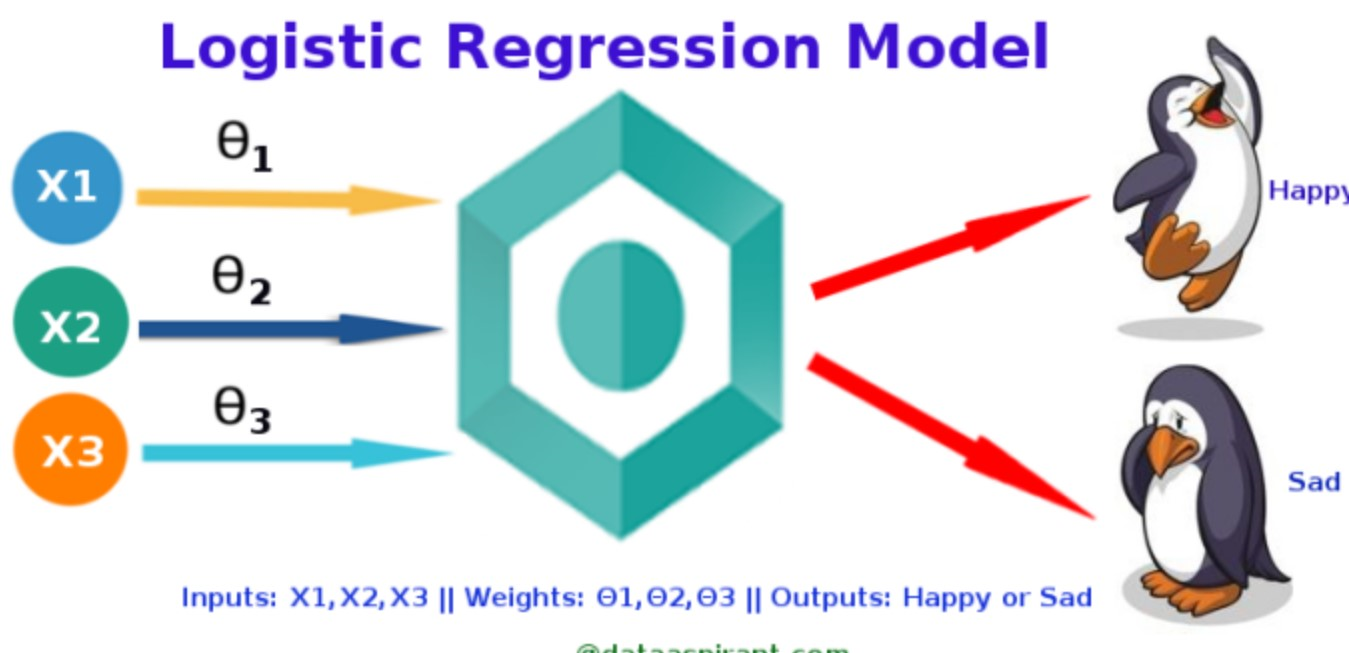

In [25]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(random_state = 0)
logit.fit(x_train, y_train)

LogisticRegression(random_state=0)

### Model Prediction

In [27]:
pred=print(logit.predict(x_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1
 0 0]


In [28]:
print(y_test)

360    0
170    0
224    1
358    0
309    1
      ..
207    0
279    0
227    1
148    0
143    0
Name: Survived, Length: 335, dtype: int64


In [29]:
import warnings
warnings.filterwarnings ('ignore')


In [97]:
res=logit.predict([[2,0]])
if (res==0):
        print('Not Survived')
else:
        print('Survived')

Survived


In [30]:
res=logit.predict([[2,1]])
if (res==0):
        print('Not Survived')
else:
        print('Survived')

Not Survived


### Conclusion
- Yes! Female passengers are survived.
